<a href="https://colab.research.google.com/github/amirularsyad/MachineLearningCourse_HW_TelU/blob/main/5thWeek/EDA_dengan_dataset_lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Muhammad Amirul Arsyad Arrayyan
#1103204207
#Tugas Week 5

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#panggil file dan jadikan dataframe
file_path = '/content/drive/MyDrive/Dataset/fastfood_calories.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [5]:
print(df.nunique(axis=0))

Unnamed: 0     515
restaurant       8
item           505
calories       113
cal_fat        117
total_fat       80
sat_fat         40
trans_fat       10
cholesterol     52
sodium         197
total_carb     103
fiber           18
sugar           31
protein         70
vit_a           21
vit_c           23
calcium         26
salad            1
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   restaurant   515 non-null    object 
 2   item         515 non-null    object 
 3   calories     515 non-null    int64  
 4   cal_fat      515 non-null    int64  
 5   total_fat    515 non-null    int64  
 6   sat_fat      515 non-null    float64
 7   trans_fat    515 non-null    float64
 8   cholesterol  515 non-null    int64  
 9   sodium       515 non-null    int64  
 10  total_carb   515 non-null    int64  
 11  fiber        503 non-null    float64
 12  sugar        515 non-null    int64  
 13  protein      514 non-null    float64
 14  vit_a        301 non-null    float64
 15  vit_c        305 non-null    float64
 16  calcium      305 non-null    float64
 17  salad        515 non-null    object 
dtypes: float64(7), int64(8), object(3)
memory usage: 7

In [7]:
df.isnull().sum()

Unnamed: 0       0
restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,258.000000,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,148.811962,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,129.500000,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,258.000000,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,386.500000,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,515.000000,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [13]:
vitc = (df.vit_a == 0).sum()
vita = (df.vit_c == 0).sum()

print("Nilai 0 di kolom vitamin a ada: ", vita)
print("Nilai 0 di kolom vitamin c ada: ", vitc)

Nilai 0 di kolom vitamin a ada:  29
Nilai 0 di kolom vitamin c ada:  35


In [14]:
df.shape

(515, 18)

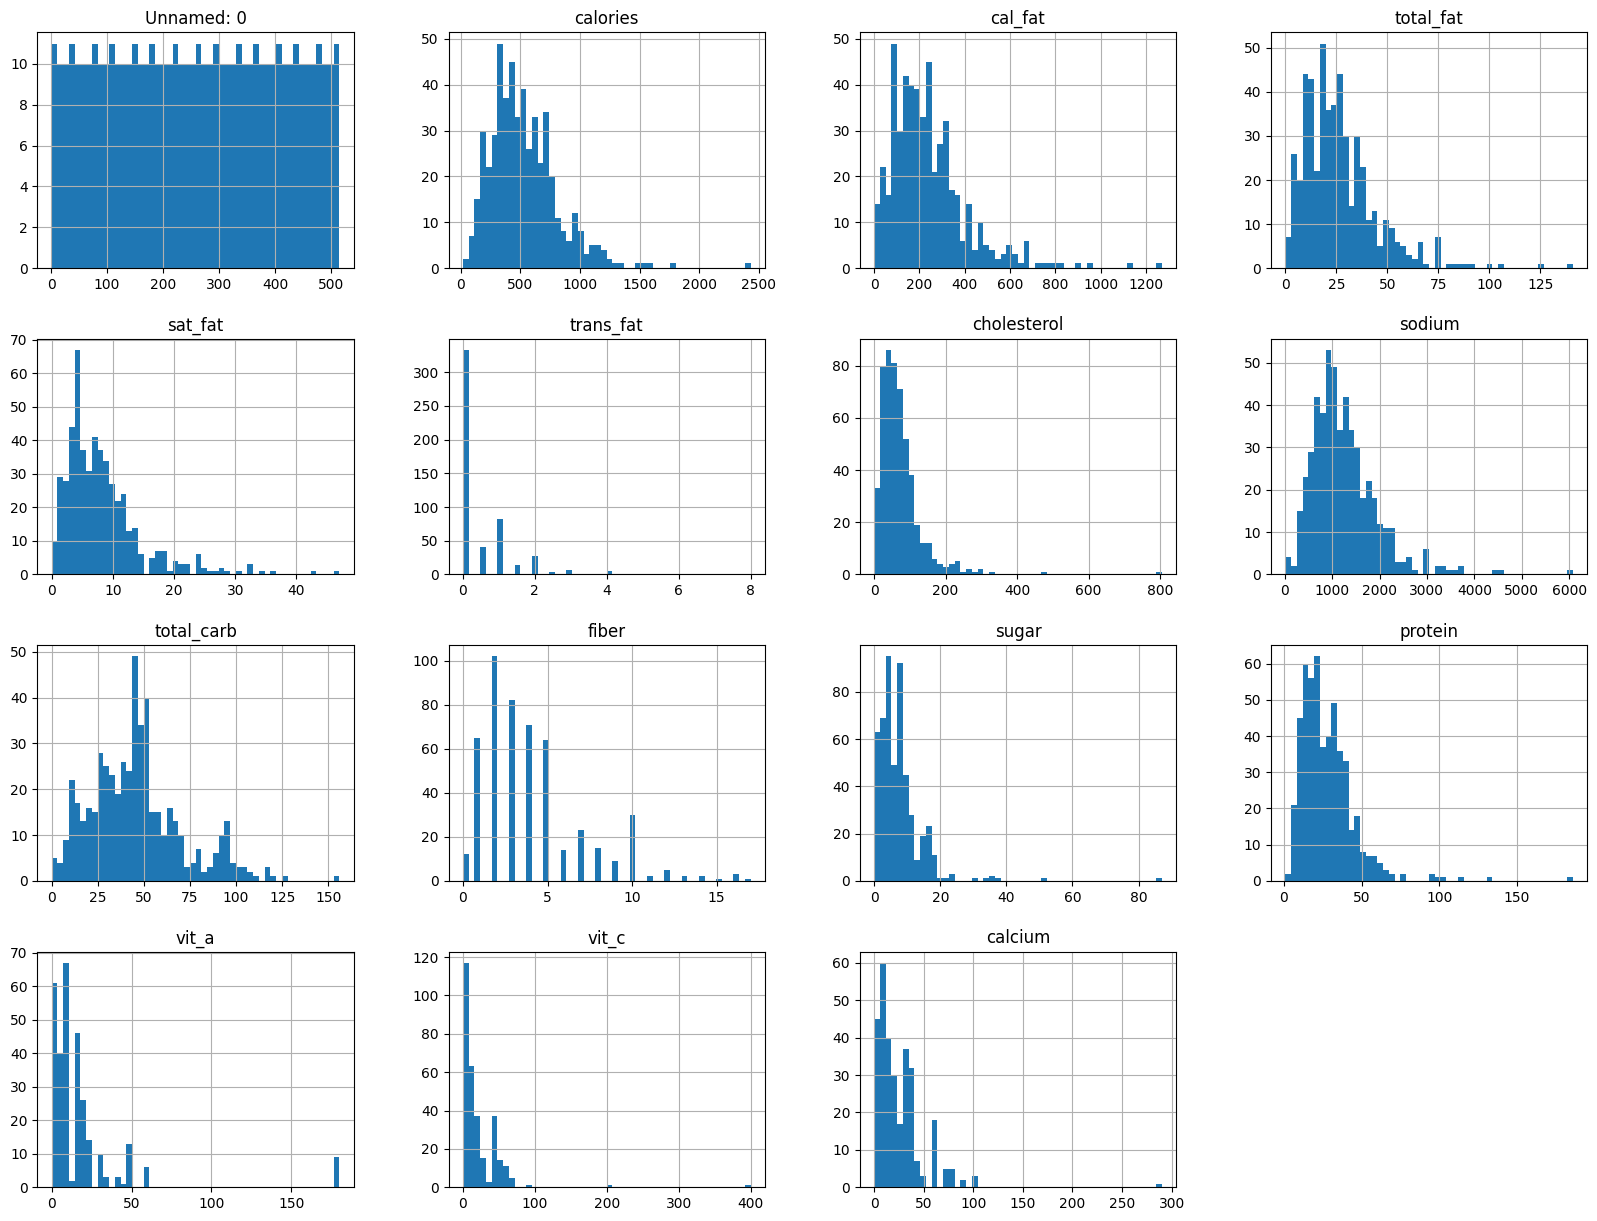

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()


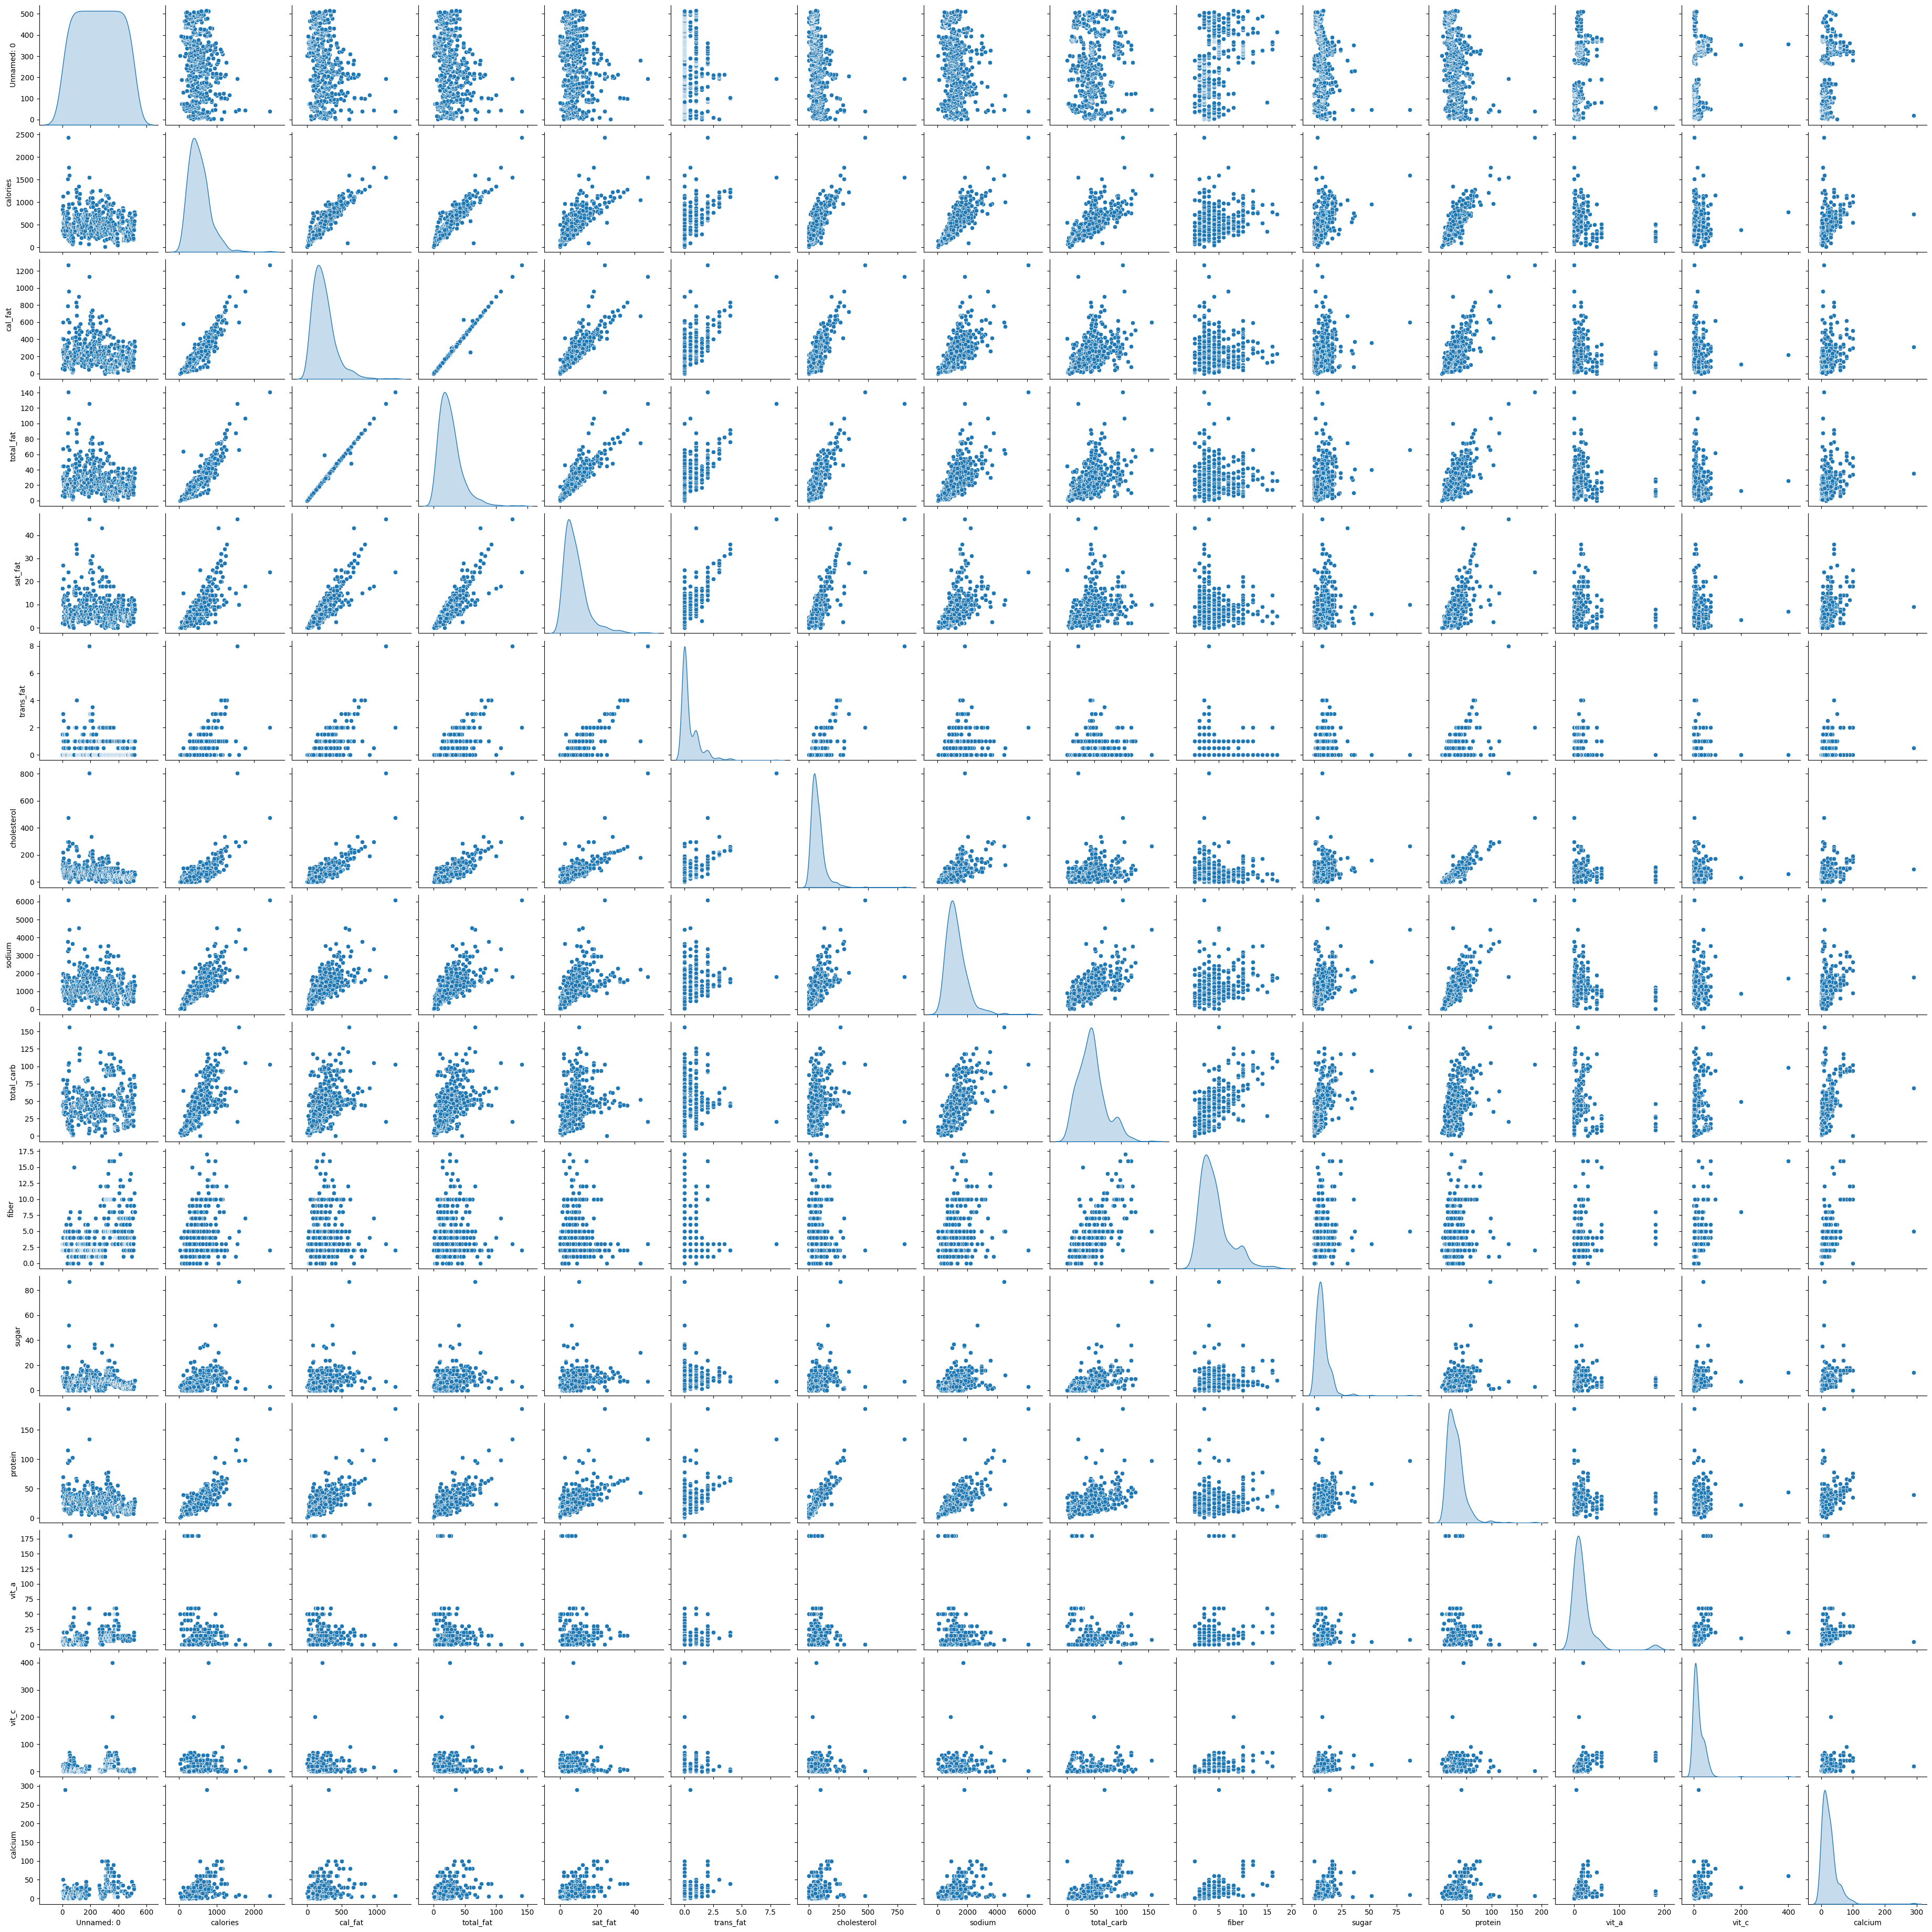

In [16]:
sns.pairplot(df, diag_kind='kde')

<ipython-input-17-441f9acadb96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix')

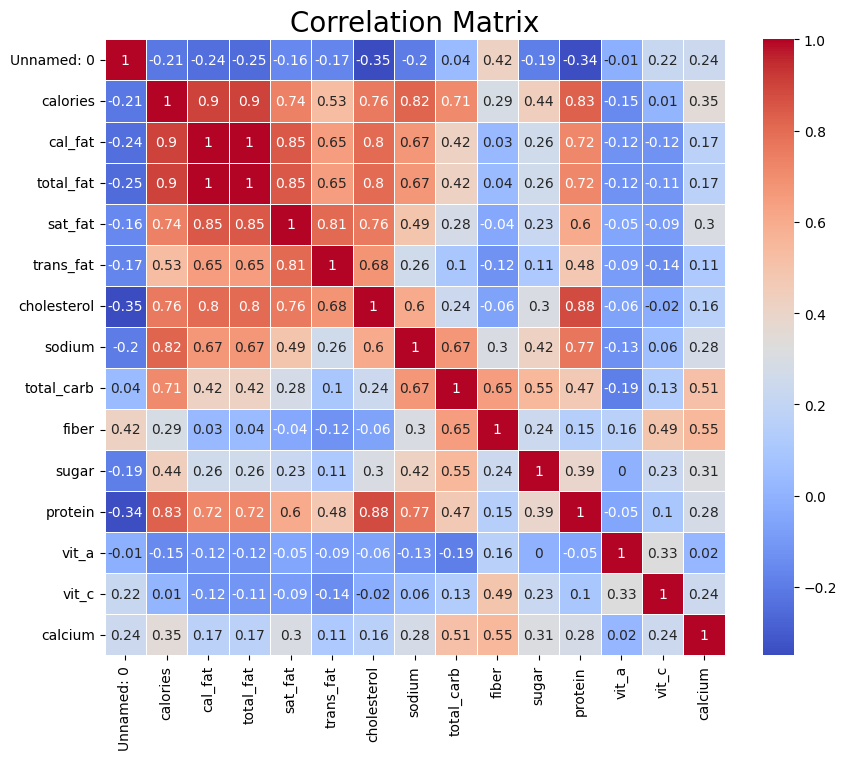

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix", size=20)

In [19]:
X = df['calories']
y = df['cal_fat']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [21]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 515
Total # sampel di seluruh dataset: 463
Total # sampel di seluruh datasett: 52


In [26]:
numerical_features = ['trans_fat', 'cholesterol']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

KeyError: ignored